In [2]:
!nvidia -smi

#This command won't work since this is a free version of collab
#It tell's the GPU assigned to us

/bin/bash: nvidia: command not found


In [3]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [4]:
#import libraries as shown 

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [5]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
ROOT_PATH = '/content/drive/MyDrive/Data Science/New folder/Deep Learning/VGG Net'

In [7]:
#current working directory
!pwd

/content


In [8]:
#Changing the working directory from 'content' to 'ROOT_PATH'

import os
os.chdir(ROOT_PATH)
os.getcwd()

'/content/drive/MyDrive/Data Science/New folder/Deep Learning/VGG Net'

In [9]:
#re size all the images to this 

#Settting to 224 since input image size of VGG 16 is 224
IMAGE_SIZE = [224,224]

train_path = 'flowers/train'
valid_path = 'flowers/validation'

In [10]:
# Import the VGG16 library as shown below and add preprocessing layer in front of VGG
# Here we will be using ImageNet weights

vgg16 = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

#IMAGE_SIZE + 3 to make image shape from 224,224 to 224, 224, 3
# Imagenet weights since this n/w is already trained on Imagenet dataset so instead of using weights from scratch, we are using pretrained weights

#Include_top = False will drop  the ANN part from n/w/. We will add custom layers later

58889256/58889256 [==============================] - 4s 0us/step


In [11]:
for layer in vgg16.layers:
  print(layer)

In [12]:
# we don't want to train the weights in the CNN part of n/w. So we freeze them

for layer in vgg16.layers:
  layer.trainable = False

In [13]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [14]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
#Tainable param  = 0 , since we have freezed the weights

In [16]:
#useful for getting the number of outpt classes

folders = glob('flowers/train/*')

In [17]:
folders

['flowers/train/rose',
 'flowers/train/tulip',
 'flowers/train/sunflower',
 'flowers/train/dandelion',
 'flowers/train/daisy']

In [18]:
len(folders)

5

In [19]:
#Creating model

model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))



In [20]:
#model summary

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 21,138,757
Trainable params: 6,424,069
Non-trainable params: 14,714,688
_________________________________________________________________


In [21]:
# tell the model what cost and optimazation method to use


model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [22]:
#use the Image data generator to import the images from the dataset

#Data augmentation on the test data only
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range= 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [23]:
#Make sure you provide the same target size as intialized for the image size

training_set= train_datagen.flow_from_directory('flowers/train',
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 600 images belonging to 5 classes.


In [24]:
test_set= test_datagen.flow_from_directory('flowers/validation',
                                           target_size = (224,224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 300 images belonging to 5 classes.


In [25]:
#fit the model

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/10
19/19 [==============================] - 545s 29s/step - loss: 2.5477 - accuracy: 0.4367 - val_loss: 0.9796 - val_accuracy: 0.6767
Epoch 2/10
19/19 [==============================] - 11s 587ms/step - loss: 0.6736 - accuracy: 0.7617 - val_loss: 0.7935 - val_accuracy: 0.7500
Epoch 3/10
19/19 [==============================] - 11s 572ms/step - loss: 0.3719 - accuracy: 0.8833 - val_loss: 0.7981 - val_accuracy: 0.7667
Epoch 4/10
19/19 [==============================] - 11s 589ms/step - loss: 0.3912 - accuracy: 0.8583 - val_loss: 0.9689 - val_accuracy: 0.6800
Epoch 5/10
19/19 [==============================] - 11s 594ms/step - loss: 0.3134 - accuracy: 0.9000 - val_loss: 0.8246 - val_accuracy: 0.7667
Epoch 6/10
19/19 [==============================] - 12s 628ms/step - loss: 0.2517 - accuracy: 0.9100 - val_loss: 1.0288 - val_accuracy: 0.7267
Epoch 7/10
19/19 [==============================] - 11s 575ms/step - loss: 0.1860 - accuracy: 0.9317 - val_loss: 1.0062 - val_accuracy: 0.7033


In [26]:
import matplotlib.pyplot as plt

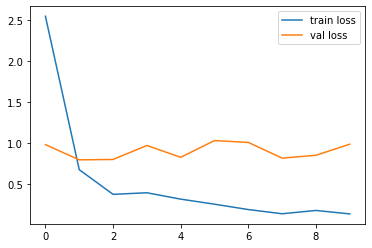

<Figure size 432x288 with 0 Axes>

In [28]:
#plot the loss

plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('Lossval_save')

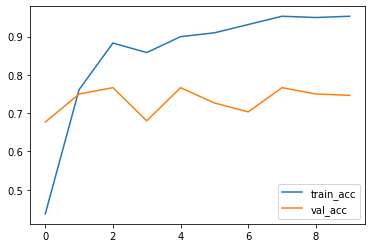

<Figure size 432x288 with 0 Axes>

In [29]:
#plot the accuracy

plt.plot(r.history['accuracy'], label = 'train_acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()
plt.savefig("Accval_acc")

In [30]:
#save it as h5 file

from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [31]:
y_pred = model.predict(test_set)

10/10 [==============================] - 2s 162ms/step


In [32]:
y_pred

array([[3.38110812e-02, 2.12825630e-02, 3.51139461e-04, 9.42254663e-01,
        2.30057887e-03],
       [7.67414808e-01, 1.57980776e-05, 2.14710698e-01, 1.75961200e-02,
        2.62567599e-04],
       [7.23532662e-02, 1.36993913e-04, 1.27830580e-01, 7.99648821e-01,
        3.03101970e-05],
       ...,
       [9.84815717e-01, 3.89372325e-03, 1.39641133e-03, 2.97150138e-04,
        9.59695131e-03],
       [4.11396177e-04, 3.97073943e-03, 3.42589573e-07, 9.95507240e-01,
        1.10239256e-04],
       [2.02073040e-03, 3.04503756e-05, 4.94009498e-07, 9.97941077e-01,
        7.25400514e-06]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred,axis = 1)

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [34]:
model = load_model('model_vgg16.h5')

In [39]:
img= image.load_img('tulip.jpg', target_size = (224,224))

In [40]:
x = image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

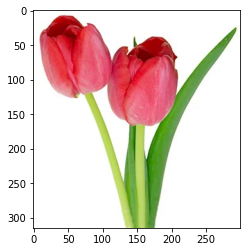

In [42]:
z = plt.imread('tulip.jpg')
plt.imshow(z)

In [44]:
x.shape

(224, 224, 3)

In [45]:
x=x/255

In [49]:
from keras.applications.vgg16  import preprocess_input

In [52]:
import numpy as np
x = np.expand_dims(x,axis =0)
x = np.
img_data = preprocess_input(x)
img_data.shape

(1, 1, 1, 224, 224, 3)

In [51]:
model.predict(img_data)

ValueError: ignored